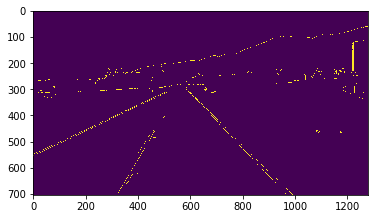

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def canny(image):
    gray = cv2.cvtColor(lane,cv2.COLOR_RGB2GRAY)
    blur = cv2.GaussianBlur(gray,(5,5),0)
    canny = cv2.Canny(blur,50,150)
    return canny

img = cv2.imread('2.1 test_image.jpg')
lane = img[:]
canny = canny(lane)

plt.imshow(canny)
plt.show()


In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def canny(image):
    gray = cv2.cvtColor(lane,cv2.COLOR_RGB2GRAY)
    blur = cv2.GaussianBlur(gray,(5,5),0)
    canny = cv2.Canny(blur,50,150)
    return canny

def region_of_interest(image):
    height = image.shape[0]
    polygons=np.array([[(200,height),(1100,height),(550,250)]])
    mask = np.zeros_like(image)
    cv2.fillPoly(mask,polygons,255)
    return mask

img = cv2.imread('2.1 test_image.jpg')
lane = img[:]
canny = canny(lane)

cv2.imshow('result',region_of_interest(canny))
cv2.waitKey(0)


233

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def canny(image):
    gray = cv2.cvtColor(lane,cv2.COLOR_RGB2GRAY)
    blur = cv2.GaussianBlur(gray,(5,5),0)
    canny = cv2.Canny(blur,50,150)
    return canny

def region_of_interest(image):
    height = image.shape[0]
    polygons=np.array([[(200,height),(1100,height),(550,250)]])
    mask = np.zeros_like(image)
    cv2.fillPoly(mask,polygons,255)
    masked_image=cv2.bitwise_and(image,mask)
    return masked_image

img = cv2.imread('2.1 test_image.jpg')
lane = img[:]
canny = canny(lane)

cv2.imshow('result',region_of_interest(canny))
cv2.waitKey(0)


113

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def canny(image):
    gray = cv2.cvtColor(lane,cv2.COLOR_RGB2GRAY)
    blur = cv2.GaussianBlur(gray,(5,5),0)
    canny = cv2.Canny(blur,50,150)
    return canny

def display_lines(image,lines):
    line_image=np.zeros_like(image)
    if lines is not None:
        for line in lines:
            x1,y1,x2,y2 = line.reshape(4)
            cv2.line(line_image,(x1,y1),(x2,y2),(255,0,0),10)
    return line_image


def region_of_interest(image):
    height = image.shape[0]
    polygons=np.array([[(200,height),(1100,height),(550,250)]])
    mask = np.zeros_like(image)
    cv2.fillPoly(mask,polygons,255)
    masked_image=cv2.bitwise_and(image,mask)
    return masked_image

img = cv2.imread('2.1 test_image.jpg')
lane = img[:]
canny = canny(lane)
crop = region_of_interest(canny)
lines = cv2.HoughLinesP(crop,2,np.pi/180,100,np.array([]),minLineLength=40,maxLineGap=5)
line_image = display_lines(lane,lines)
cv2.imshow('result',line_image)
cv2.waitKey(0)


113

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def canny(image):
    gray = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)
    blur = cv2.GaussianBlur(gray,(5,5),0)
    canny = cv2.Canny(blur,50,150)
    return canny

def display_lines(image,lines):
    line_image=np.zeros_like(image)
    if lines is not None:
        for line in lines:
            x1,y1,x2,y2 = line.reshape(4)
            cv2.line(line_image,(x1,y1),(x2,y2),(255,0,0),10)
    return line_image


def region_of_interest(image):
    height = image.shape[0]
    polygons=np.array([[(200,height),(1100,height),(550,250)]])
    mask = np.zeros_like(image)
    cv2.fillPoly(mask,polygons,255)
    masked_image=cv2.bitwise_and(image,mask)
    return masked_image

img = cv2.imread('2.1 test_image.jpg')
lane = img[:]
canny = canny(lane)
crop = region_of_interest(canny)
lines = cv2.HoughLinesP(crop,2,np.pi/180,100,np.array([]),minLineLength=40,maxLineGap=5)
line_image = display_lines(lane,lines)
combo_image = cv2.addWeighted(lane,0.8,line_image,1,1)
cv2.imshow('result',combo_image)
cv2.waitKey(0)

113

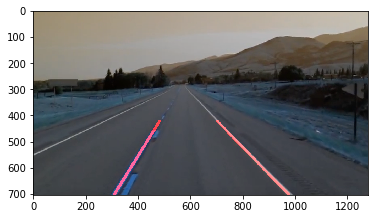

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


def make_coordinates(image,line_parameters):
    slope,intercept = line_parameters
    y1 = image.shape[0]
    y2 = int(y1*(3/5))
    x1 = int((y1-intercept)/slope)
    x2 = int((y2-intercept)/slope)
    return np.array([x1,y1,x2,y2])


def average_slope_intercept(image,lines):
    left_fit = []
    right_fit = []
    for line in lines:
        x1,y1,x2,y2=line.reshape(4)
        parameters = np.polyfit((x1,x2),(y1,y2),1)
        slope = parameters[0]
        intercept = parameters[1]
        if slope<0:
            left_fit.append((slope,intercept))
        else:
            right_fit.append((slope,intercept))
    left_fit_avg = np.average(left_fit,axis=0)
    right_fit_avg = np.average(right_fit,axis=0)
    left_line = make_coordinates(image,left_fit_avg)
    right_line = make_coordinates(image,right_fit_avg)
    return np.array([left_line,right_line])

def canny(image):
    gray = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)
    blur = cv2.GaussianBlur(gray,(5,5),0)
    canny = cv2.Canny(blur,50,150)
    return canny

def display_lines(image,lines):
    line_image=np.zeros_like(image)
    if lines is not None:
        for x1,y1,x2,y2 in lines:
            cv2.line(line_image,(x1,y1),(x2,y2),(255,0,0),10)
    return line_image


def region_of_interest(image):
    height = image.shape[0]
    polygons=np.array([[(200,height),(1100,height),(550,250)]])
    mask = np.zeros_like(image)
    cv2.fillPoly(mask,polygons,255)
    masked_image=cv2.bitwise_and(image,mask)
    return masked_image

img = cv2.imread('2.1 test_image.jpg')
lane = img[:]
canny = canny(lane)
crop = region_of_interest(canny)
lines = cv2.HoughLinesP(crop,2,np.pi/180,100,np.array([]),minLineLength=40,maxLineGap=5)
average_lines = average_slope_intercept(lane,lines)
line_image = display_lines(lane,average_lines)
combo_image = cv2.addWeighted(lane,0.8,line_image,1,1)
plt.imshow(combo_image)
plt.show()

In [16]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


def make_coordinates(image,line_parameters):
    slope,intercept = line_parameters
    y1 = int(image.shape[0])
    y2 = int(y1*(3/5))
    x1 = int((y1-intercept)/slope)
    x2 = int((y2-intercept)/slope)
    return np.array([x1,y1,x2,y2])


def average_slope_intercept(image,lines):
    left_fit = []
    right_fit = []
    for line in lines:
        x1,y1,x2,y2=line.reshape(4)
        parameters = np.polyfit((x1,x2),(y1,y2),1)
        slope = parameters[0]
        intercept = parameters[1]
        if slope<0:
            left_fit.append((slope,intercept))
        else:
            right_fit.append((slope,intercept))
    left_fit_avg = np.average(left_fit,axis=0)
    right_fit_avg = np.average(right_fit,axis=0)
    left_line = make_coordinates(image,left_fit_avg)
    right_line = make_coordinates(image,right_fit_avg)
    return np.array([left_line,right_line])

def canny(image):
    gray = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)
    blur = cv2.GaussianBlur(gray,(5,5),0)
    canny = cv2.Canny(blur,50,150)
    return canny

def display_lines(image,lines):
    line_image=np.zeros_like(image)
    if lines is not None:
        for x1,y1,x2,y2 in lines:
            cv2.line(line_image,(x1,y1),(x2,y2),(255,0,0),10)
    return line_image


def region_of_interest(image):
    height = image.shape[0]
    polygons=np.array([[(200,height),(1100,height),(550,250)]])
    mask = np.zeros_like(image)
    cv2.fillPoly(mask,polygons,255)
    masked_image=cv2.bitwise_and(image,mask)
    return masked_image

#img = cv2.imread('2.1 test_image.jpg')
#lane = img[:]
#canny = canny(lane)
#crop = region_of_interest(canny)
#lines = cv2.HoughLinesP(crop,2,np.pi/180,100,np.array([]),minLineLength=40,maxLineGap=5)
#average_lines = average_slope_intercept(lane,lines)
#line_image = display_lines(lane,average_lines)
#combo_image = cv2.addWeighted(lane,0.8,line_image,1,1)
#plt.imshow(combo_image)
#plt.show()



cap = cv2.VideoCapture('test2.mp4')
while(cap.isOpened()):
    _,frame = cap.read()
    canny_image = canny(frame)
    crop = region_of_interest(canny_image)
    lines = cv2.HoughLinesP(crop,2,np.pi/180,100,np.array([]),minLineLength=40,maxLineGap=5)
    average_lines = average_slope_intercept(frame,lines)
    line_image = display_lines(frame,average_lines)
    combo_image = cv2.addWeighted(frame,0.8,line_image,1,1)
    cv2.imshow('result',combo_image)
    if cv2.waitKey(1) == ord('q'):
        break
        
cap.release()
cv2.destroyAllWindows()

In [13]:
import cv2
import numpy as np

def make_points(image, line):
    slope, intercept = line
    y1 = int(image.shape[0])# bottom of the image
    y2 = int(y1*3/5)         # slightly lower than the middle
    x1 = int((y1 - intercept)/slope)
    x2 = int((y2 - intercept)/slope)
    return [[x1, y1, x2, y2]]

def average_slope_intercept(image, lines):
    left_fit    = []
    right_fit   = []
    if lines is None:
        return None
    for line in lines:
        for x1, y1, x2, y2 in line:
            fit = np.polyfit((x1,x2), (y1,y2), 1)
            slope = fit[0]
            intercept = fit[1]
            if slope < 0: # y is reversed in image
                left_fit.append((slope, intercept))
            else:
                right_fit.append((slope, intercept))
    # add more weight to longer lines    
    left_fit_average  = np.average(left_fit, axis=0)
    right_fit_average = np.average(right_fit, axis=0)
    left_line  = make_points(image, left_fit_average)
    right_line = make_points(image, right_fit_average)
    averaged_lines = [left_line, right_line]
    return averaged_lines

def canny(img):
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    kernel = 5
    blur = cv2.GaussianBlur(gray,(5, 5),0)
    canny = cv2.Canny(gray, 50, 150)
    return canny

def display_lines(image,lines):
    line_image = np.zeros_like(image)
    if lines is not None:
        for line in lines:
            for x1, y1, x2, y2 in line:
                cv2.line(line_image,(x1,y1),(x2,y2),(255,0,0),10)
    return line_image

def region_of_interest(canny):
    height = canny.shape[0]
    width = canny.shape[1]
    mask = np.zeros_like(canny)

    triangle = np.array([[
    (200, height),
    (550, 250),
    (1100, height),]], np.int32)

    cv2.fillPoly(mask, triangle, 255)
    masked_image = cv2.bitwise_and(canny, mask)
    return masked_image


'''image = cv2.imread('test_image.jpg')
lane_image = np.copy(image)
lane_canny = canny(lane_image)
cropped_canny = region_of_interest(lane_canny)
lines = cv2.HoughLinesP(cropped_canny, 2, np.pi/180, 100, np.array([]), minLineLength=40,maxLineGap=5)
averaged_lines = average_slope_intercept(image, lines)
line_image = display_lines(lane_image, averaged_lines)
combo_image = cv2.addWeighted(lane_image, 0.8, line_image, 1, 0) 
'''
cap = cv2.VideoCapture('test2.mp4')
while(cap.isOpened()):
    _, frame = cap.read()
    lane_canny = canny(frame)
    cropped_canny = region_of_interest(lane_canny)
    lines = cv2.HoughLinesP(cropped_canny, 2, np.pi/180, 100, np.array([]), minLineLength=40,maxLineGap=5)
    averaged_lines = average_slope_intercept(cropped_canny, lines)
    line_image = display_lines(frame, averaged_lines)
    combo_image = cv2.addWeighted(frame, 0.8, line_image, 1, 0) 
    cv2.imshow("image", combo_image)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()


In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [25]:
def sigmoid(score):
    return 1/(1+np.exp(-score))

def calc_error(linear_parameters,points,y):
    m = points.shape[0]
    p = sigmoid(points*linear_parameters)
    cross_entropy = -(np.log(p).T*y + np.log(1-p).T*(1-y))/m
    return cross_entropy

def gradient_descent(line_parameters,points,y,alpha):
    m = points.shape[0]
    for i in range(500):
        p = sigmoid(points*linear_parameters)
        gradient = (points.T*(p-y))*(alpha/m)
        line_parameters = line_parameters-gradient
        w1 = line_parameters.item(0)
        w2 = line_parameters.item(1)
        b = line_parameters.item(2)
        x1 = np.array([points[:,0].min(),points[:,0].max()])
        x2 = -b/w1+x1*(-w1/w2)
    plt.plot(x1,x2)

In [8]:
pts=10
np.random.seed(0)
bias = np.ones(pts)
top_region = np.array([np.random.normal(10,2,pts),np.random.normal(12,2,pts),bias]).T
bottom_region = np.array([np.random.normal(5,2,pts),np.random.normal(6,2,pts),bias]).T
all_points = np.vstack((top_region,bottom_region))
w1 = -0.2
w2 = -0.35
b=3.5
linear_parameters = np.matrix(np.zeros(3)).T
x1 = np.array([bottom_region[:,0].min(),top_region[:,0].max()])
x2 = -b/w1+x1*(-w1/w2)
y = np.array([np.zeros(pts),np.ones(pts)]).reshape(pts*2,1)
p = sigmoid(all_points*linear_parameters)
p.shape

(20, 1)

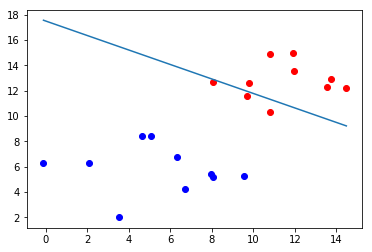

In [44]:
plt.scatter(top_region[:,0],top_region[:,1],c='r')
plt.scatter(bottom_region[:,0],bottom_region[:,1],c='b')
plt.plot(x1,x2)
plt.show()

In [45]:
print(calc_error(linear_parameters,all_points,y))

[[0.31787835]]


In [67]:
def sigmoid(score):
    return 1/(1+np.exp(-score))

def calc_error(linear_parameters,points,y):
    m = points.shape[0]
    p = sigmoid(points*linear_parameters)
    cross_entropy = -(np.log(p).T*y + np.log(1-p).T*(1-y))/m
    return cross_entropy
def gradient_descent(line_parameters,points,y,alpha):
    m = points.shape[0]
    for i in range(2000):
        p = sigmoid(points*line_parameters)
        gradient = points.T*(p-y)*(alpha/m)
        line_parameters = line_parameters-gradient
        
        w1 = line_parameters.item(0)
        w2 = line_parameters.item(1)
        b = line_parameters.item(2)
        
        x1 = np.array([points[:,0].min(),points[:,0].max()])
        x2 = -b/w2+(x1*(-w1/w2))
    plt.plot(x1,x2)

pts=100
np.random.seed(0)
bias = np.ones(pts)
top_region = np.array([np.random.normal(10,2,pts),np.random.normal(12,2,pts),bias]).T
bottom_region = np.array([np.random.normal(5,2,pts),np.random.normal(6,2,pts),bias]).T
all_points = np.vstack((top_region,bottom_region))
linear_parameters = np.matrix(np.zeros(3)).T
'''x1 = np.array([bottom_region[:,0].min(),top_region[:,0].max()])
x2 = -b/w1+x1*(-w1/w2)'''
y = np.array([np.zeros(pts),np.ones(pts)]).reshape(pts*2,1)

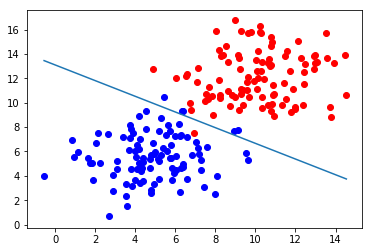

In [68]:
_, ax= plt.subplots(figsize=(4,4))
ax.scatter(top_region[:,0], top_region[:,1], color='r')
ax.scatter(bottom_region[:,0], bottom_region[:,1], color='b')
gradient_descent(line_parameters, all_points, y , 0.06)
plt.show()

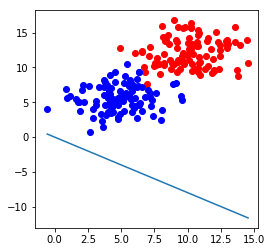

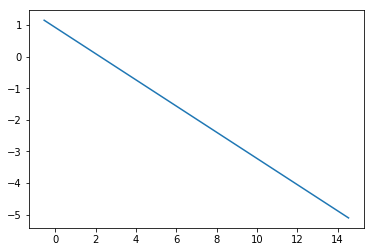

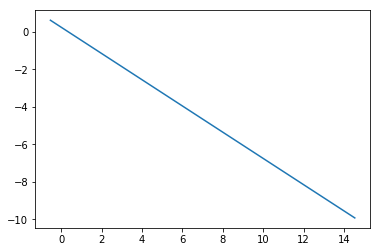

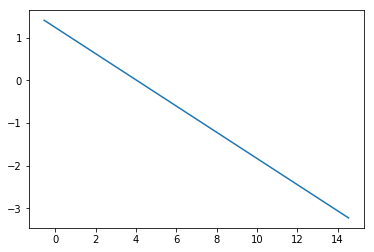

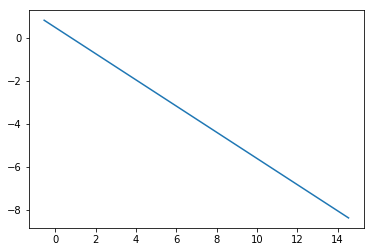

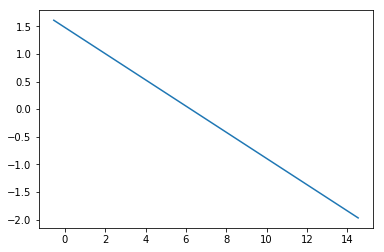

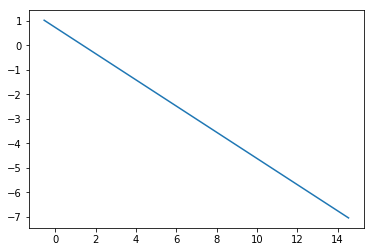

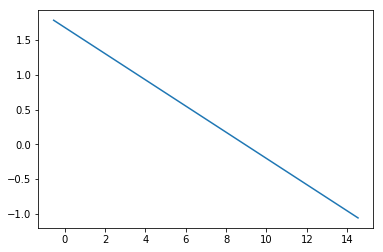

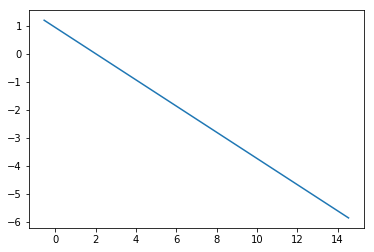

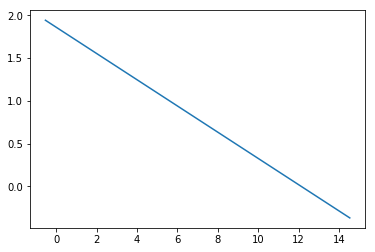

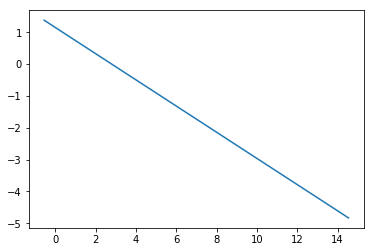

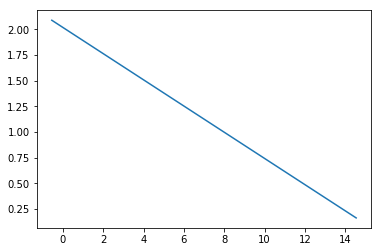

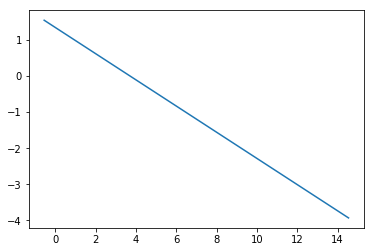

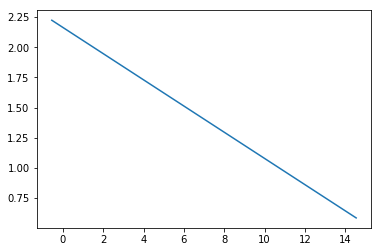

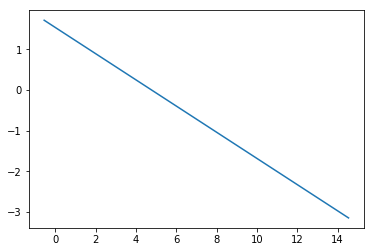

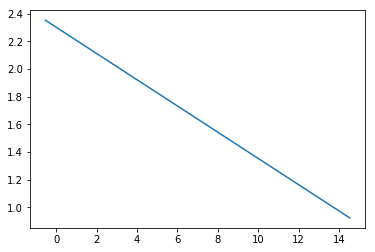

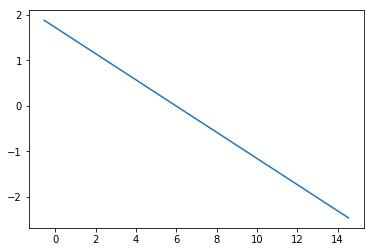

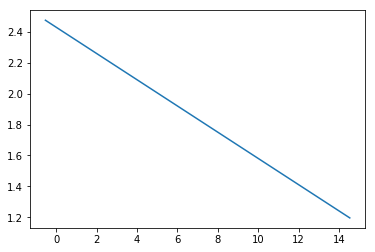

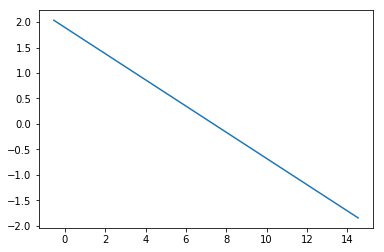

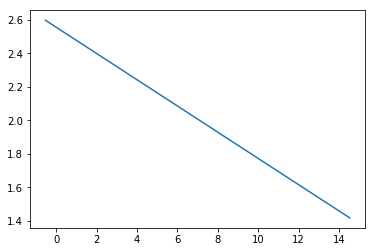

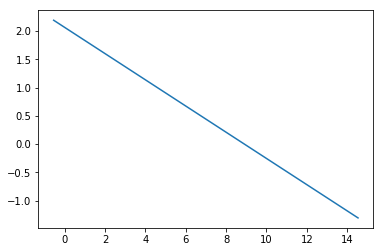

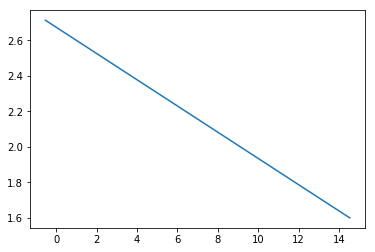

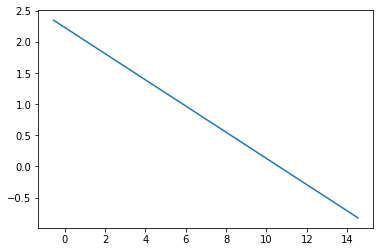

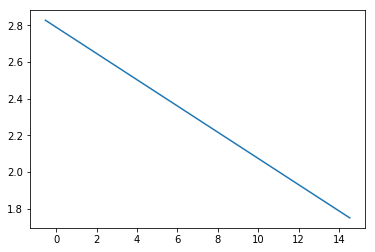

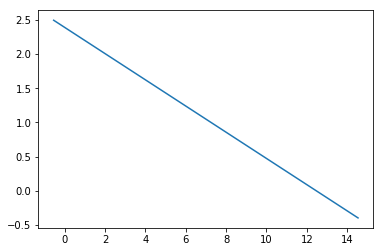

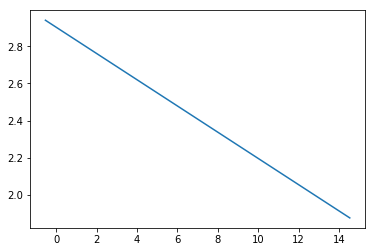

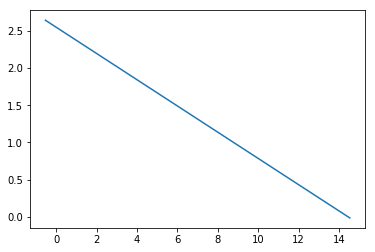

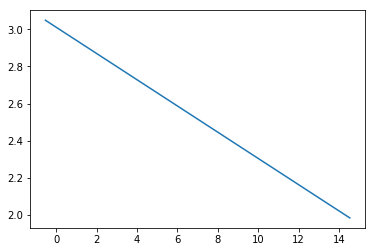

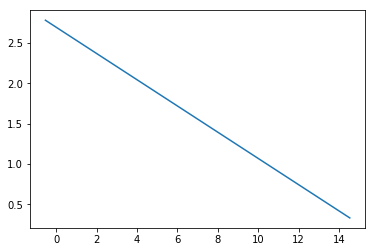

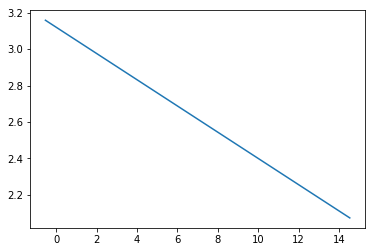

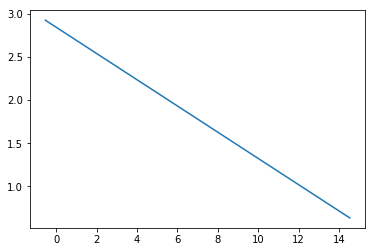

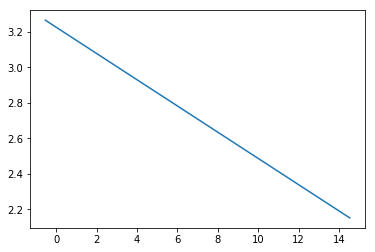

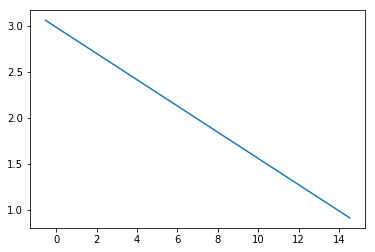

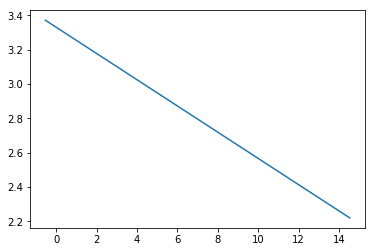

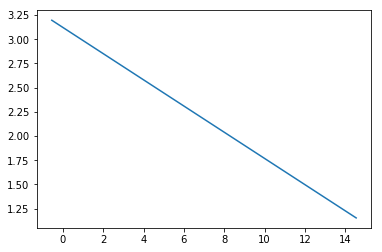

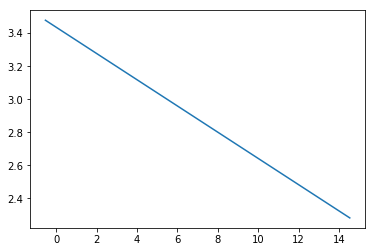

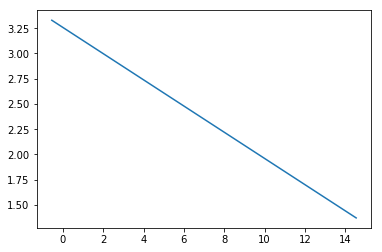

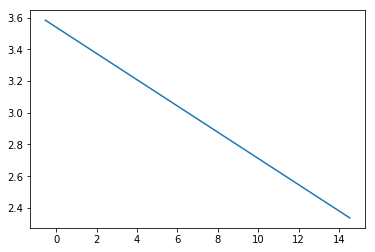

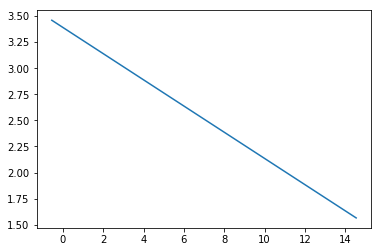

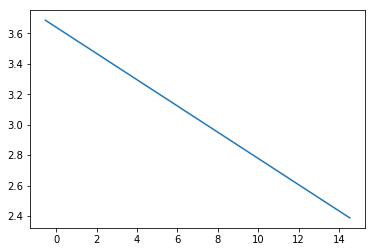

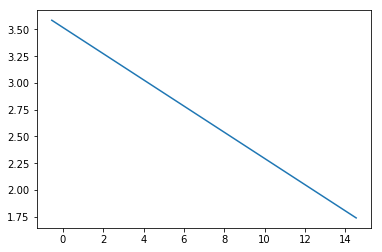

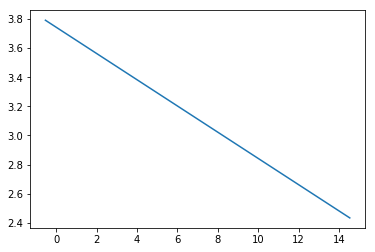

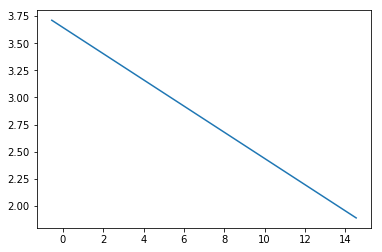

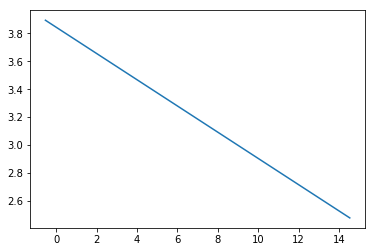

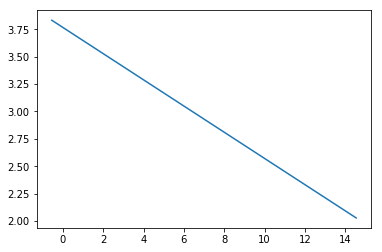

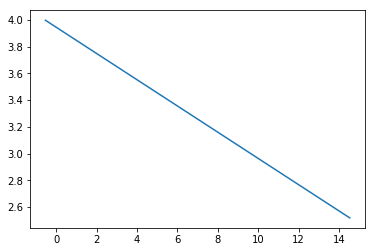

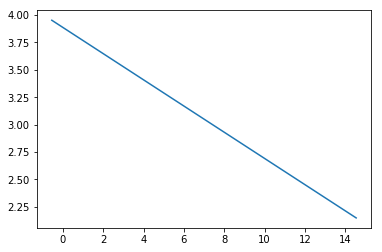

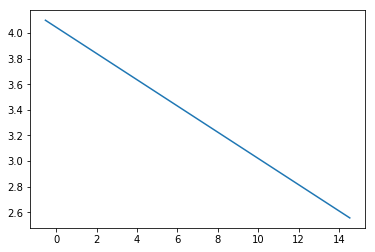

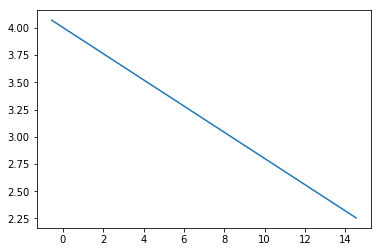

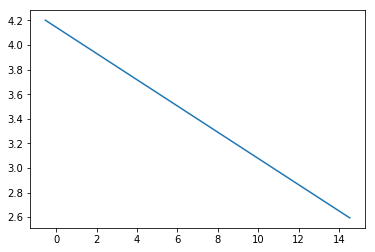

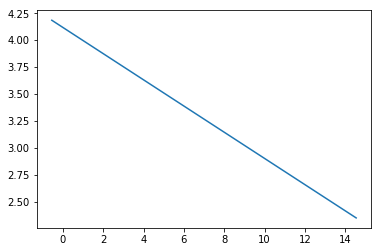

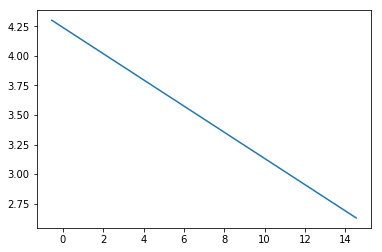

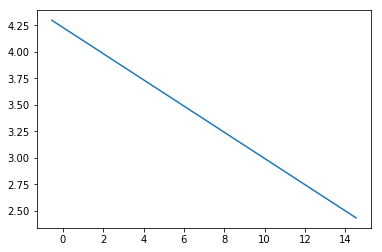

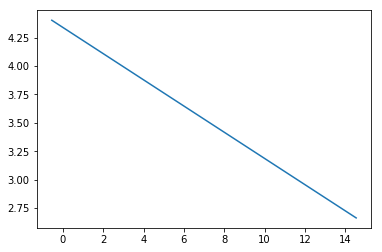

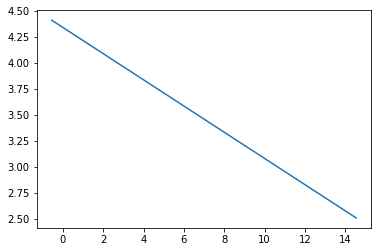

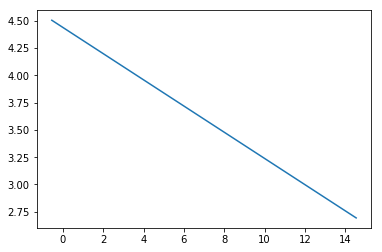

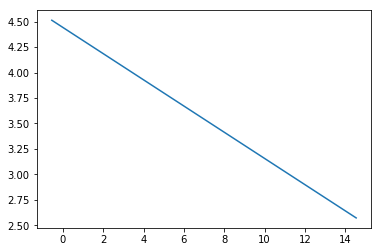

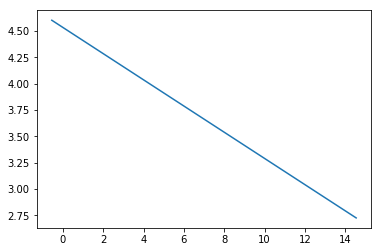

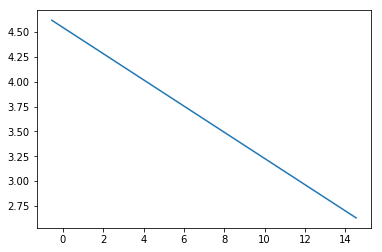

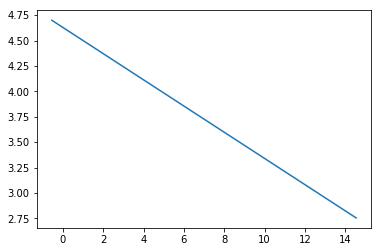

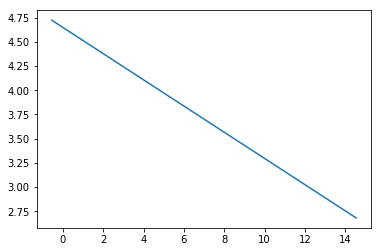

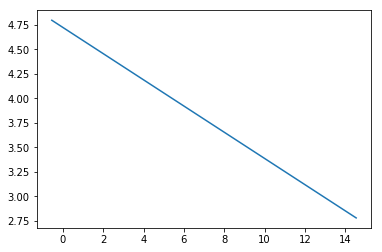

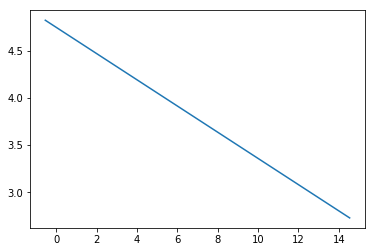

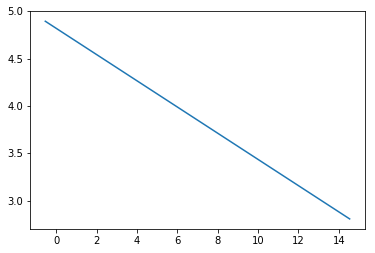

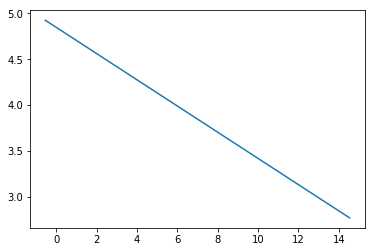

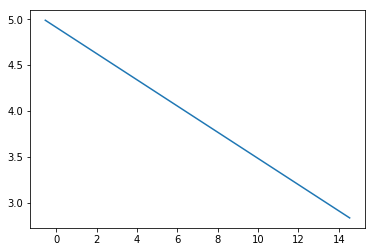

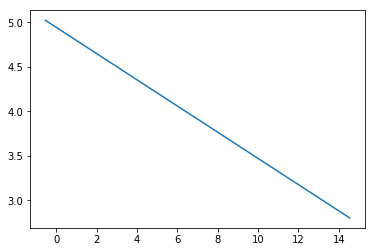

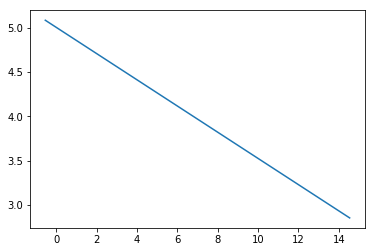

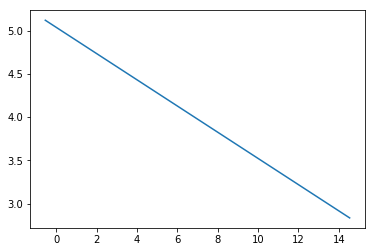

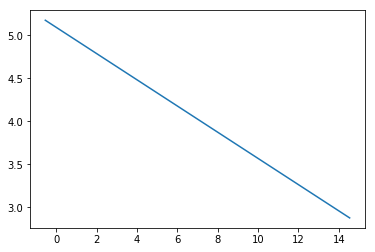

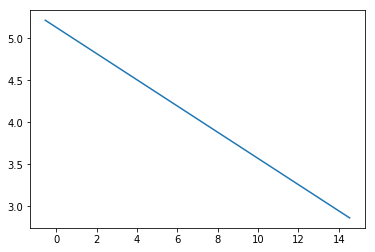

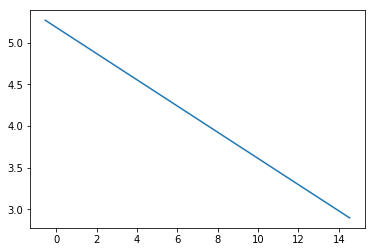

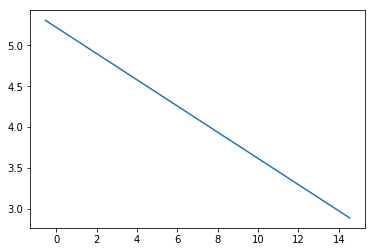

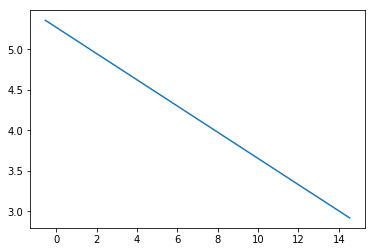

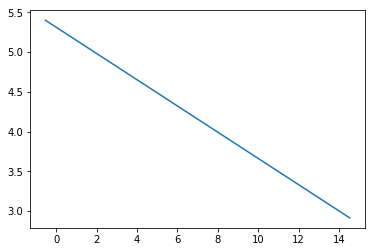

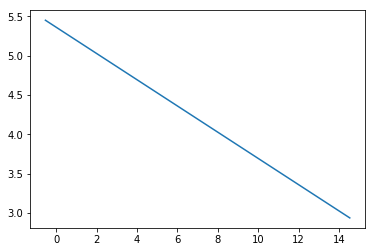

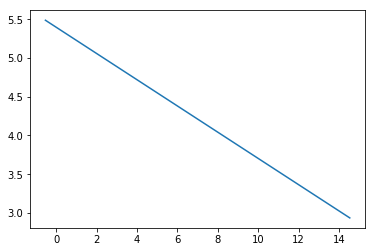

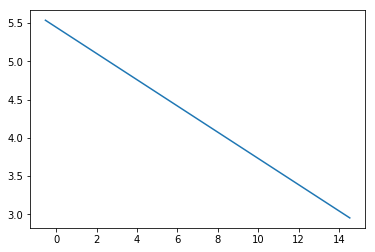

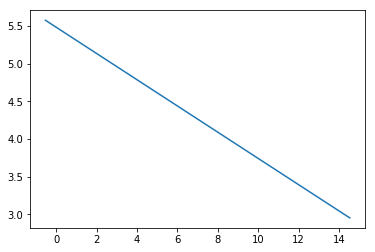

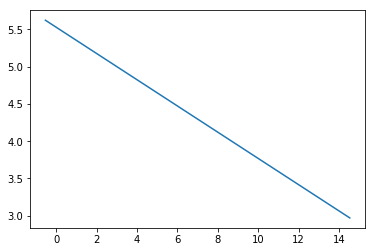

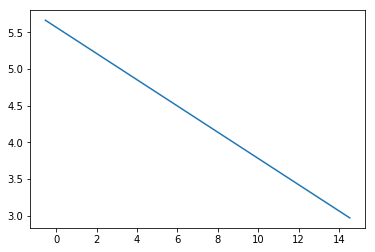

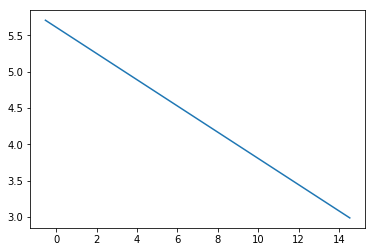

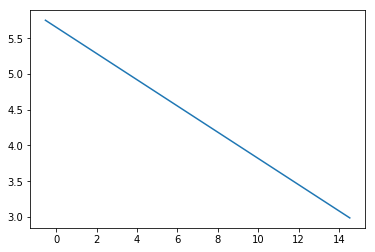

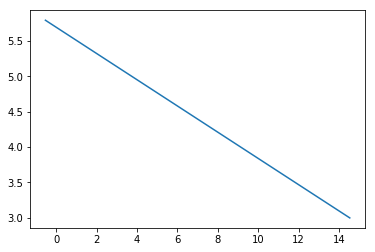

KeyboardInterrupt: 

In [36]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def draw(x1,x2):
  ln=plt.plot(x1,x2)

def sigmoid(score):
  return 1/(1+np.exp(-score))

def calculate_error(line_parameters, points , y):
  n=points.shape[0]
  p= sigmoid(points*line_parameters)
  cross_entropy=-(1/n)*(np.log(p).T*y + np.log(1-p).T*(1-y))
  return cross_entropy

def gradient_descent(line_parameters, points, y , alpha):
  n=points.shape[0]
  for i in range(2000):
    p=sigmoid(points*line_parameters)
    gradient= points.T*(p-y)*(alpha/n)
    line_parameters = line_parameters - gradient
    
    w1=line_parameters.item(0)
    w2=line_parameters.item(1)
    b=line_parameters.item(2)
    
    x1=np.array([points[:,0].min(), points[:,0].max()])
    x2= -b/w2 + (x1*(-w1/w2))
  draw(x1,x2) 

  
n_pts=100
np.random.seed(0)
bias= np.ones(n_pts)
top_region=np.array([np.random.normal(10,2,n_pts), np.random.normal(12,2,n_pts), bias]).T
bottom_region= np.array([np.random.normal(5,2, n_pts), np.random.normal(6,2, n_pts), bias]).T
all_points=np.vstack((top_region, bottom_region))

line_parameters = np.matrix([np.zeros(3)]).T
# x1=np.array([bottom_region[:,0].min(), top_region[:,0].max()])
# x2= -b/w2 + (x1*(-w1/w2))
y=np.array([np.zeros(n_pts), np.ones(n_pts)]).reshape(n_pts*2, 1)

_, ax= plt.subplots(figsize=(4,4))
ax.scatter(top_region[:,0], top_region[:,1], color='r')
ax.scatter(bottom_region[:,0], bottom_region[:,1], color='b')
gradient_descent(line_parameters, all_points, y , 0.06)
plt.show()
